<h1>ERA-20C, NOAA, GPCC, Multimodel</h1>

In [2]:
extreme_percent=10

Load GPCC

In [3]:
#load precip from GPCC 
precip_gpcc = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')[:-36,:,:]
#get seasonal averages from precip
precip_djf_gpcc,centered_lon_precip_gpcc = fix_lon(seasonal_averages(precip_gpcc.values,season='DJF'),precip_gpcc.lon.values)
#get latitude of gpcc data
lat_precip_gpcc = precip_gpcc.lat.values

Load ERA

In [4]:
#######################g#####################        Calculate AHA          ################################################
threshold = 1018.5  
lat_range = [10,52]
lon_range = [-60,10]

# #load psl for ERA 20CR
# psl_era = xr.open_dataarray('/mnt/cmip5-data/reanalysis/era.20c/sfc/msl/moda/msl.mon.mean.nc')[12:,:,:]
# #get seasonal average DJF, also center longitude
# psl_djf_era,centered_lon_psl_era = fix_lon(seasonal_averages(psl_era.values,season='DJF')/100,psl_era.longitude.values)

# #filter the SLP with spatial and intensity filters 
# ah_era = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf_era,
#                                                      below=True,
#                                                      threshold=threshold),
#                         lat=psl_era.latitude.values,lat_range=lat_range,
#                         lon=centered_lon_psl_era,lon_range=lon_range)

# #calculate area filtered data 
# aha_era = get_area_of_filtered_data(ah_era,psl_era.latitude.values,centered_lon_psl_era)

#calculate high pressure threshold for ERA 20C data
region = dict(lat_min = 10,
              lat_max = 52,
              lon_min = -60,
              lon_max = 10)
threshold_era = get_threshold(filename='/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc',
                              var_name='PSL',
                              open_as_data_array=True,
                              fix_lon=False,
                              calculate_seasonal_average=False,
                              region=region)

#load detrended era 20C data
psl_djf_era          = np.load('/data/ncresswell/ERA-20C/DETRENDED_SLP.DJF.ERA-20C.npy')[1:,:,:]
centered_lon_psl_era = xr.open_dataarray('/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc')['lon'].values
lat_psl_era          = xr.open_dataarray('/data/ncresswell/ERA-20C/SLP.DJF.ERA-20C.nc')['lat'].values

#filter the SLP with spatial and intensity filters 
ah_era = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf_era,
                                                     below=True,
                                                     threshold=threshold_era),
                        lat=lat_psl_era, lat_range=lat_range,
                        lon=centered_lon_psl_era, lon_range=lon_range)

#calculate area filtered data 
aha_era = get_area_of_filtered_data(ah_era,lat_psl_era,centered_lon_psl_era)

#########################################        Moisture Transport       #################################################

#load humidity and wind from ERA 20C
q_850hPa_era = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/q/moda/q.mon.mean.nc')['q'].loc[:,850,:,:][12:,:,:]
u_850hPa_era = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/u/moda/u.mon.mean.nc')['u'].loc[:,850,:,:][12:,:,:]
v_850hPa_era = xr.open_dataset('/mnt/cmip5-data/reanalysis/era.20c/pl/v/moda/v.mon.mean.nc')['v'].loc[:,850,:,:][12:,:,:]
#get seasonal averages and calculate moisture transport
uq_850hPa_djf_era = seasonal_averages((q_850hPa_era*u_850hPa_era).values,season='DJF')
vq_850hPa_djf_era = seasonal_averages((q_850hPa_era*v_850hPa_era).values,season='DJF')


###########################################################################################################################
#############################################     CALCULATE EXTREME COMPOSITES ############################################
###########################################################################################################################

###########################################     FIND EXTREME EVENTS    #########################################
_,where_largest_era  = get_extremes(series=aha_era,percent=extreme_percent,top=True)

###########################################     PRECIP ANOMALIES   ##############################################
precip_largest_anomaly_era                  = precip_djf_gpcc[where_largest_era,:,:].mean(axis=0)-precip_djf_gpcc.mean(axis=0)
precip_largest_anomaly_era_percent_of_mean  = (precip_largest_anomaly_era/precip_djf_gpcc.mean(axis=0))*100
# precip_largest_ttest    = ttest_ind(precip_djf,precip_djf[where_largest,:,:])[1]
# precip_smallest_ttest   = ttest_ind(precip_djf,precip_djf[where_smallest,:,:])[1]
#######################################     U TRANSPORT ANOMALIES   ##########################################
uq_largest_anomaly_era  = uq_850hPa_djf_era[where_largest_era,:,:].mean(axis=0)-uq_850hPa_djf_era.mean(axis=0)
#######################################     V TRANSPORT ANOMALIES   ##########################################
vq_largest_anomaly_era  = vq_850hPa_djf_era[where_largest_era,:,:].mean(axis=0)-vq_850hPa_djf_era.mean(axis=0)
#######################################     PSL ANOMALIES   ##########################################
psl_largest_anomaly_era = psl_djf_era[where_largest_era,:,:].mean(axis=0) - psl_djf_era.mean(axis=0)

Load NOAA

In [5]:
############################################        Calculate AHA          ################################################
threshold = 1018.5  
lat_range = [10,52]
lon_range = [-60,10]

# #load psl for ERA 20CR
# psl_noaa = xr.open_dataset('/mnt/cmip5-data/reanalysis/noaa.cires.20crv2c/monolevel/prmsl/monthly/prmsl.mon.mean.nc')['prmsl'][12*50:-12*4,:,:]
# #get seasonal average DJF, also center longitude
# psl_djf_noaa,centered_lon_psl_noaa = fix_lon(seasonal_averages(psl_noaa.values,season='DJF')/100,psl_noaa.lon.values)
# #filter the SLP with spatial and intensity filters 
# ah_noaa = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf_noaa,
#                                                        below=True,
#                                                        threshold=threshold),
#                           lat=psl_noaa.lat.values,lat_range=lat_range,
#                           lon=centered_lon_psl_noaa,lon_range=lon_range)
# #calculate area filtered data 
# aha_noaa = get_area_of_filtered_data(ah_noaa,psl_noaa.lat.values,centered_lon_psl_noaa)

#calculate high pressure threshold for ERA 20C data
region = dict(lat_min = 10,
              lat_max = 52,
              lon_min = -60,
              lon_max = 10)
threshold_noaa = get_threshold(filename='/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc',
                               var_name='PSL',
                               open_as_data_array=True,
                               fix_lon=False,
                               calculate_seasonal_average=False,
                               region=region)

#NOAA-CIRES-20CR
psl_djf_noaa = np.load('/data/ncresswell/NOAA-CIRES_20CR/DETRENDED_SLP.DJF.NOAA-CIRS_20CR.npy')[50:-4,:,:]
centered_lon_psl_noaa = xr.open_dataarray('/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc')['lon'].values
lat_psl_noaa = xr.open_dataarray('/data/ncresswell/NOAA-CIRES_20CR/SLP.DJF.NOAA-CIRS_20CR.nc')['lat'].values

ah_noaa = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf_noaa,
                                                       below=True,
                                                       threshold=threshold_noaa),
                          lat=lat_psl_noaa,lat_range=lat_range,
                          lon=centered_lon_psl_noaa,lon_range=lon_range)
#calculate area filtered data 
aha_noaa = get_area_of_filtered_data(ah_noaa,lat_psl_noaa,centered_lon_psl_noaa)

#########################################        Moisture Transport       #################################################

#load humidity and wind from ERA 20C
q_850hPa_noaa = xr.open_dataset('/mnt/cmip5-data/reanalysis/noaa.cires.20crv2c/pressure/shum/monthly/shum.mon.mean.nc')['shum'].loc[:,850,:,:][12*50:-12*4,:,:]
u_850hPa_noaa = xr.open_dataset('/mnt/cmip5-data/reanalysis/noaa.cires.20crv2c/pressure/uwnd/monthly/uwnd.mon.mean.nc')['uwnd'].loc[:,850,:,:][12*50:-12*4,:,:]
v_850hPa_noaa = xr.open_dataset('/mnt/cmip5-data/reanalysis/noaa.cires.20crv2c/pressure/vwnd/monthly/vwnd.mon.mean.nc')['vwnd'].loc[:,850,:,:][12*50:-12*4,:,:]
#get seasonal averages and calculate moisture transport
uq_850hPa_djf_noaa = seasonal_averages((q_850hPa_noaa*u_850hPa_noaa).values,season='DJF')
vq_850hPa_djf_noaa = seasonal_averages((q_850hPa_noaa*v_850hPa_noaa).values,season='DJF')

###########################################################################################################################
#############################################     CALCULATE EXTREME COMPOSITES ############################################
###########################################################################################################################

###########################################     FIND EXTREME EVENTS    #########################################
_,where_largest_noaa  = get_extremes(series=aha_noaa,percent=extreme_percent,top=True)

###########################################     PRECIP ANOMALIES   ##############################################
precip_largest_anomaly_noaa  = precip_djf_gpcc[where_largest_noaa,:,:].mean(axis=0)-precip_djf_gpcc.mean(axis=0)
precip_largest_anomaly_noaa_percent_of_mean  = (precip_largest_anomaly_noaa/precip_djf_gpcc.mean(axis=0))*100
#######################################     U TRANSPORT ANOMALIES   ##########################################
uq_largest_anomaly_noaa  = uq_850hPa_djf_noaa[where_largest_noaa,:,:].mean(axis=0)-uq_850hPa_djf_noaa.mean(axis=0)
#######################################     V TRANSPORT ANOMALIES   ##########################################
vq_largest_anomaly_noaa  = vq_850hPa_djf_noaa[where_largest_noaa,:,:].mean(axis=0)-vq_850hPa_djf_noaa.mean(axis=0)
#######################################     PSL ANOMALIES   ##########################################
psl_largest_anomaly_noaa = psl_djf_noaa[where_largest_noaa,:,:].mean(axis=0) - psl_djf_noaa.mean(axis=0)

Load multimodel output

In [6]:
miroc_lon=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.precip&qtrans.nc')['miroc_lon'].values
miroc_lat=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.precip&qtrans.nc')['miroc_lat'].values
miroc_precip = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.precip&qtrans.nc')['miroc_precip'].values
miroc_uq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.precip&qtrans.nc')['miroc_uq'].values
miroc_vq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.precip&qtrans.nc')['miroc_vq'].values
miroc_psl = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.psl.nc')['miroc_psl'].values
miroc_lon_centered = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/miroc.past100.largeAHevents.psl.nc')['miroc_lon_centered'].values

bcc_lon=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.precip&qtrans.nc')['bcc_lon'].values
bcc_lat=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.precip&qtrans.nc')['bcc_lat'].values
bcc_precip = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.precip&qtrans.nc')['bcc_precip'].values
bcc_uq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.precip&qtrans.nc')['bcc_uq'].values
bcc_vq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.precip&qtrans.nc')['bcc_vq'].values
bcc_psl = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.psl.nc')['bcc_psl'].values
bcc_lon_centered = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/bcc.past100.largeAHevents.psl.nc')['bcc_lon_centered'].values

ipsl_lon=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.precip&qtrans.nc')['ipsl_lon'].values
ipsl_lat=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.precip&qtrans.nc')['ipsl_lat'].values
ipsl_precip = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.precip&qtrans.nc')['ipsl_precip'].values
ipsl_uq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.precip&qtrans.nc')['ipsl_uq'].values
ipsl_vq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.precip&qtrans.nc')['ipsl_vq'].values
ipsl_psl = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.psl.nc')['ipsl_psl'].values
ipsl_lon_centered = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ipsl.past100.largeAHevents.psl.nc')['ipsl_lon_centered'].values

mpi_lon=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.precip&qtrans.nc')['mpi_lon'].values
mpi_lat=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.precip&qtrans.nc')['mpi_lat'].values
mpi_precip = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.precip&qtrans.nc')['mpi_precip'].values
mpi_uq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.precip&qtrans.nc')['mpi_uq'].values
mpi_vq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.precip&qtrans.nc')['mpi_vq'].values
mpi_psl = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.psl.nc')['mpi_psl'].values
mpi_lon_centered = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/mpi.past100.largeAHevents.psl.nc')['mpi_lon_centered'].values

ccsm_lon=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.precip&qtrans.nc')['ccsm_lon'].values
ccsm_lat=xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.precip&qtrans.nc')['ccsm_lat'].values
ccsm_precip = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.precip&qtrans.nc')['ccsm_precip'].values
ccsm_uq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.precip&qtrans.nc')['ccsm_uq'].values
ccsm_vq = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.precip&qtrans.nc')['ccsm_vq'].values
ccsm_psl = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.psl.nc')['ccsm_psl'].values
ccsm_lon_centered = xr.open_dataset('/home/ncresswell/Desktop/AzoresHigh_Nature/temp/ccsm.past100.largeAHevents.psl.nc')['ccsm_lon_centered'].values


Interpolate output onto regular grid

In [7]:
lat_interp          = np.arange(-90,90,2)
lon_interp          = np.arange(0,360,2)
lon_interp_centered = np.arange(-180,180,2)

###########################################################################################################################
#                                                         MIROC 
###########################################################################################################################
psl_interpolated = get_interpolated_grid(lon_data=miroc_lon_centered,
                                         lat_data=miroc_lat,
                                         data = miroc_psl,
                                         lon_interp=lon_interp_centered)
uq_interpolated = get_interpolated_grid(lon_data=miroc_lon,
                                        lat_data=miroc_lat,
                                        data = miroc_uq)
vq_interpolated = get_interpolated_grid(lon_data=miroc_lon,
                                        lat_data=miroc_lat,
                                        data = miroc_vq)
pr_interpolated = get_interpolated_grid(lon_data=miroc_lon,
                                        lat_data=miroc_lat,
                                        data = miroc_precip)

###########################################################################################################################
#                                                         BCC
###########################################################################################################################
psl_interpolated = np.concatenate([np.expand_dims(psl_interpolated,axis=0),
                                   np.expand_dims(get_interpolated_grid(lon_data=bcc_lon_centered,
                                                                       lat_data=bcc_lat,
                                                                       data = bcc_psl,
                                                                       lon_interp=lon_interp_centered),
                                                   axis=0)],
                                  axis=0)
uq_interpolated = np.concatenate([np.expand_dims(uq_interpolated,axis=0),
                                  np.expand_dims(get_interpolated_grid(lon_data=bcc_lon,
                                                                       lat_data=bcc_lat,
                                                                       data    = bcc_uq),
                                                  axis=0)],
                                  axis=0)
vq_interpolated = np.concatenate([np.expand_dims(vq_interpolated,axis=0),
                                  np.expand_dims(get_interpolated_grid(lon_data=bcc_lon,
                                                                       lat_data=bcc_lat,
                                                                       data    = bcc_vq),
                                                  axis=0)],
                                  axis=0)
pr_interpolated = np.concatenate([np.expand_dims(pr_interpolated,axis=0),
                                  np.expand_dims(get_interpolated_grid(lon_data=bcc_lon,
                                                                       lat_data=bcc_lat,
                                                                       data    = bcc_precip),
                                                  axis=0)],
                                  axis=0)

###########################################################################################################################      
#                                                        IPSL-ESM 
###########################################################################################################################
psl_interpolated = np.concatenate([psl_interpolated,
                                   np.expand_dims(get_interpolated_grid(lon_data =ipsl_lon_centered,
                                                                       lat_data  =ipsl_lat,
                                                                       data      =ipsl_psl,
                                                                       lon_interp=lon_interp_centered),
                                                   axis=0)],
                                  axis=0)
uq_interpolated = np.concatenate([uq_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =ipsl_lon,
                                                                       lat_data  =ipsl_lat,
                                                                       data      =ipsl_uq),
                                                   axis=0)],
                                  axis=0)
vq_interpolated = np.concatenate([vq_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =ipsl_lon,
                                                                       lat_data  =ipsl_lat,
                                                                       data      =ipsl_vq),
                                                   axis=0)],
                                  axis=0)
pr_interpolated = np.concatenate([pr_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =ipsl_lon,
                                                                       lat_data  =ipsl_lat,
                                                                       data      =ipsl_precip),
                                                   axis=0)],
                                  axis=0)

###########################################################################################################################      
#                                                           MPI 
###########################################################################################################################
psl_interpolated = np.concatenate([psl_interpolated,
                                   np.expand_dims(get_interpolated_grid(lon_data =mpi_lon_centered,
                                                                       lat_data  =mpi_lat,
                                                                       data      =mpi_psl,
                                                                       lon_interp=lon_interp_centered),
                                                   axis=0)],
                                  axis=0)
uq_interpolated = np.concatenate([uq_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =mpi_lon,
                                                                       lat_data  =mpi_lat,
                                                                       data      =mpi_uq),
                                                   axis=0)],
                                  axis=0)
vq_interpolated = np.concatenate([vq_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =mpi_lon,
                                                                       lat_data  =mpi_lat,
                                                                       data      =mpi_vq),
                                                   axis=0)],
                                  axis=0)
pr_interpolated = np.concatenate([pr_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =mpi_lon,
                                                                       lat_data  =mpi_lat,
                                                                       data      =mpi_precip),
                                                   axis=0)],
                                  axis=0)

###########################################################################################################################      
#                                                           CCSM 
###########################################################################################################################
psl_interpolated = np.concatenate([psl_interpolated,
                                   np.expand_dims(get_interpolated_grid(lon_data =ccsm_lon_centered,
                                                                       lat_data  =ccsm_lat,
                                                                       data      =ccsm_psl,
                                                                       lon_interp=lon_interp_centered),
                                                   axis=0)],
                                  axis=0)
uq_interpolated = np.concatenate([uq_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =ccsm_lon,
                                                                       lat_data  =ccsm_lat,
                                                                       data      =ccsm_uq),
                                                   axis=0)],
                                  axis=0)
vq_interpolated = np.concatenate([vq_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =ccsm_lon,
                                                                       lat_data  =ccsm_lat,
                                                                       data      =ccsm_vq),
                                                   axis=0)],
                                  axis=0)
pr_interpolated = np.concatenate([pr_interpolated,
                                  np.expand_dims(get_interpolated_grid(lon_data  =ccsm_lon,
                                                                       lat_data  =ccsm_lat,
                                                                       data      =ccsm_precip),
                                                   axis=0)],
                                  axis=0)

#average fields for plotting

Now I'll create a plot with composites from all observations and multimodel mean included

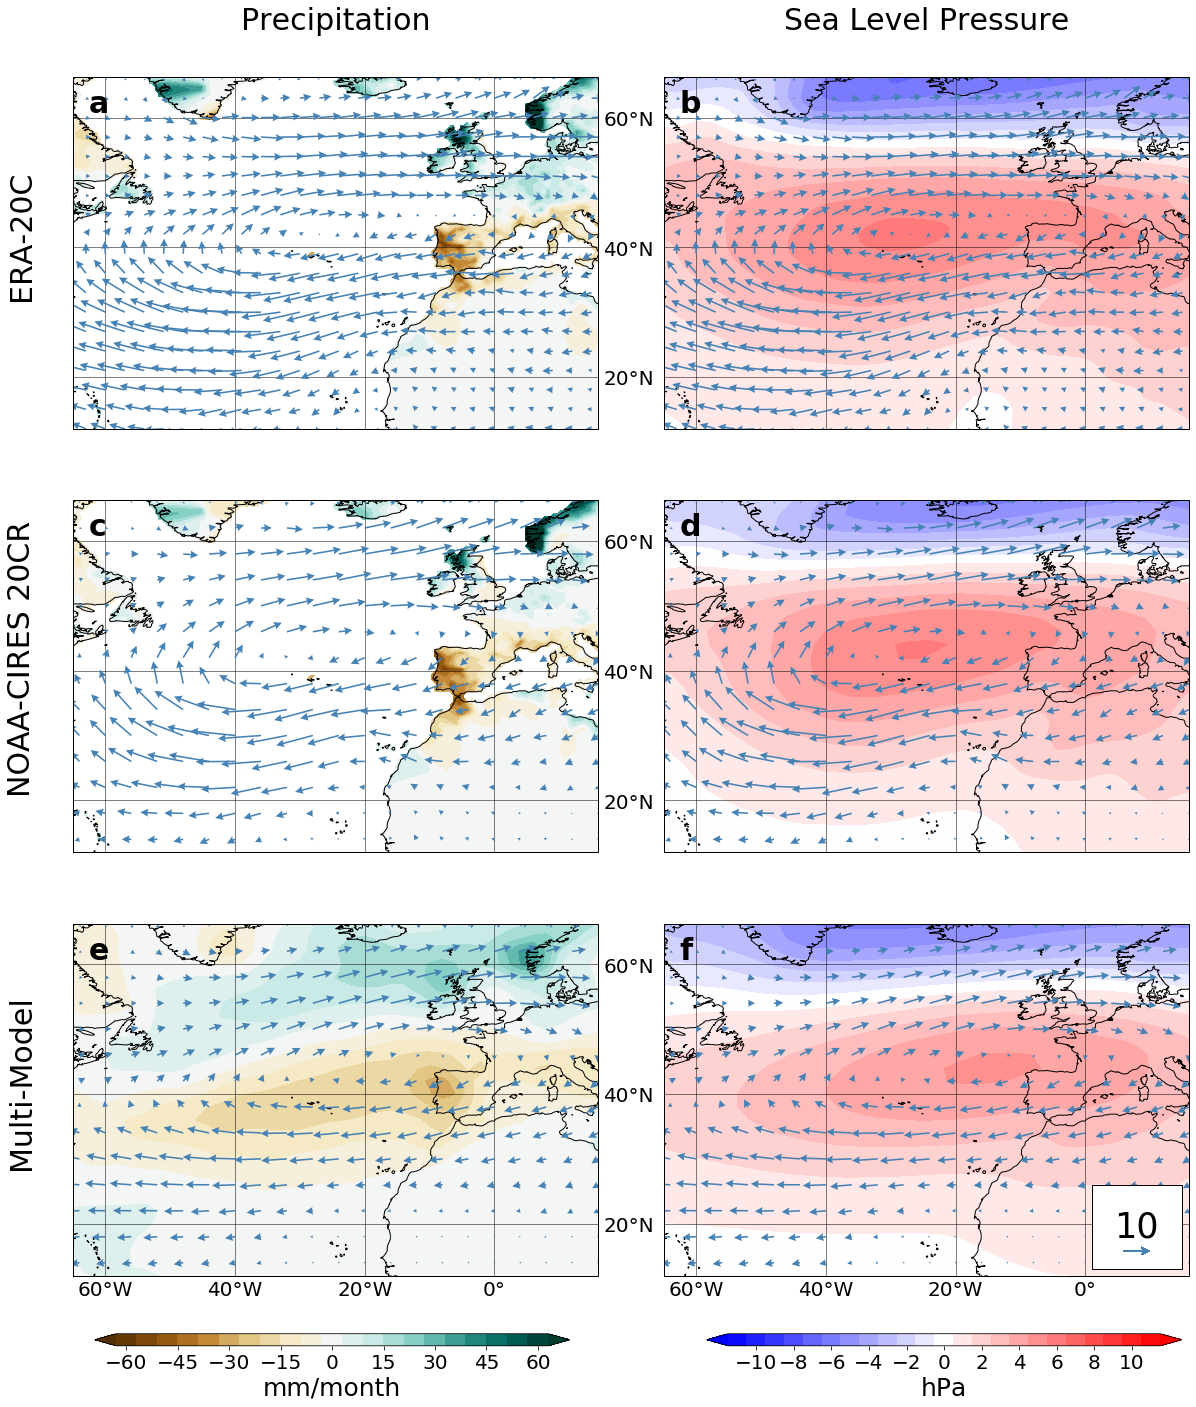

In [8]:
#initialize figure
fig = plt.figure(figsize=(20,24))
rows=3

##############################################        ERA-20CR          ##################################################

#q transport and precip during large AH
era_precip_qtrans   = get_baseproj(plt.subplot(rows,2,1,projection=ccrs.PlateCarree()),show_lat=True)
era_precip_qtrans,_ = plot_precip(ax=era_precip_qtrans,lon=centered_lon_precip_gpcc,lat=lat_precip_gpcc,precip=precip_largest_anomaly_era)
era_precip_qtrans,_ = plot_qtrans(ax=era_precip_qtrans,lon=q_850hPa_era['longitude'],lat=q_850hPa_era['latitude'],qu=uq_largest_anomaly_era,qv=vq_largest_anomaly_era,skip=3)
era_precip_qtrans.text(x=.03,y=.9,
                       s='a',
                       fontsize=30,
                       transform=era_precip_qtrans.transAxes,fontweight='bold')
era_precip_qtrans.text(-0.07, 0.55, 'ERA-20C', va='bottom', ha='center',
                        rotation='vertical', rotation_mode='anchor',
                        transform=era_precip_qtrans.transAxes,fontsize=30)
era_precip_qtrans.text(0.5, 1.2, 'Precipitation', va='top', ha='center',
                        rotation='horizontal', rotation_mode='anchor',
                        transform=era_precip_qtrans.transAxes,fontsize=30)
#q transport and psl during large AH 
era_psl_qtrans   = get_baseproj(plt.subplot(rows,2,2,projection=ccrs.PlateCarree()))
era_psl_qtrans,_ = plot_psl(ax=era_psl_qtrans,lon=centered_lon_psl_era,lat=q_850hPa_era['latitude'],psl=psl_largest_anomaly_era)
era_psl_qtrans,_ = plot_qtrans(ax=era_psl_qtrans,lon=q_850hPa_era['longitude'],lat=q_850hPa_era['latitude'],qu=uq_largest_anomaly_era,qv=vq_largest_anomaly_era,skip=3)
era_psl_qtrans.text(0.5, 1.2, 'Sea Level Pressure', va='top', ha='center',
                        rotation='horizontal', rotation_mode='anchor',
                        transform=era_psl_qtrans.transAxes,fontsize=30)
era_psl_qtrans.text(x=.03,y=.9,
                    s='b',
                    fontsize=30,
                    transform=era_psl_qtrans.transAxes,fontweight='bold')

##############################################        NOAA-20CR          ##################################################

#q transport and precip during large AH
noaa_precip_qtrans   = get_baseproj(plt.subplot(rows,2,3,projection=ccrs.PlateCarree()),show_lat=True)
noaa_precip_qtrans,_ = plot_precip(ax=noaa_precip_qtrans,lon=centered_lon_precip_gpcc,lat=lat_precip_gpcc,precip=precip_largest_anomaly_noaa)
noaa_precip_qtrans,_ = plot_qtrans(ax=noaa_precip_qtrans,lon=q_850hPa_noaa['lon'],lat=q_850hPa_noaa['lat'],qu=uq_largest_anomaly_noaa,qv=vq_largest_anomaly_noaa)
noaa_precip_qtrans.text(x=.03,y=.9,
                       s='c',
                       fontsize=30,
                       transform=noaa_precip_qtrans.transAxes,fontweight='bold')
noaa_precip_qtrans.text(-0.07, 0.55, 'NOAA-CIRES 20CR', va='bottom', ha='center',
                        rotation='vertical', rotation_mode='anchor',
                        transform=noaa_precip_qtrans.transAxes,fontsize=30)
#q transport and psl during large AH 
noaa_psl_qtrans   = get_baseproj(plt.subplot(rows,2,4,projection=ccrs.PlateCarree()))
noaa_psl_qtrans,_ = plot_psl(ax=noaa_psl_qtrans,lon=centered_lon_psl_noaa,lat=q_850hPa_noaa['lat'],psl=psl_largest_anomaly_noaa)
noaa_psl_qtrans,_ = plot_qtrans(ax=noaa_psl_qtrans,lon=q_850hPa_noaa['lon'],lat=q_850hPa_noaa['lat'],qu=uq_largest_anomaly_noaa,qv=vq_largest_anomaly_noaa)
noaa_psl_qtrans.text(x=.03,y=.9,
                       s='d',
                       fontsize=30,
                       transform=noaa_psl_qtrans.transAxes,fontweight='bold')
##############################################        MultiModel          ##################################################

mm_precip_qtrans   = get_baseproj(plt.subplot(3,2,5,projection=ccrs.PlateCarree()),show_lon=True,show_lat=True)
mm_precip_qtrans,precips = plot_precip(ax=mm_precip_qtrans,
                                       lon=lon_interp,
                                       lat=lat_interp,
                                       precip=np.nanmean(pr_interpolated,axis=0),
                                       conversion=1,
                                       add_cp_lon=True)
mm_precip_qtrans,_ = plot_qtrans(ax=mm_precip_qtrans,
                                 lon=lon_interp,
                                 lat=lat_interp,
                                 qu=np.nanmean(uq_interpolated,axis=0),
                                 qv=np.nanmean(vq_interpolated,axis=0),
                                 skip=2)
mm_precip_qtrans.text(-0.07, 0.55, 'Multi-Model', va='bottom', ha='center',
                        rotation='vertical', rotation_mode='anchor',
                        transform=mm_precip_qtrans.transAxes,fontsize=30)
mm_precip_qtrans.text(x=.03,y=.9,
                      s='e',
                      fontsize=30,
                      transform=mm_precip_qtrans.transAxes,fontweight='bold')
#q transport and psl during large AH 
mm_psl_qtrans   = get_baseproj(plt.subplot(3,2,6,projection=ccrs.PlateCarree()),show_lat=False,show_lon=True)
mm_psl_qtrans,pres = plot_psl(ax=mm_psl_qtrans,
                              lon=lon_interp_centered,
                              lat=lat_interp,
                              psl=psl_interpolated.mean(axis=0))
mm_psl_qtrans,vecs = plot_qtrans(ax=mm_psl_qtrans,
                              lon=lon_interp,
                              lat=lat_interp,
                              qu=uq_interpolated.mean(axis=0),
                              qv=vq_interpolated.mean(axis=0),
                              skip=2)
mm_psl_qtrans.text(x=.03,y=.9,
                      s='f',
                      fontsize=30,
                      transform=mm_psl_qtrans.transAxes,fontweight='bold')


#ADD COLORBARS
fig.subplots_adjust(bottom=0.145)
#precip colorbar
precip_cbar_ax = fig.add_axes([0.14, 0.125, 0.33, 0.007])
precip_cbar = fig.colorbar(precips, cax=precip_cbar_ax,orientation='horizontal',ticks=np.arange(-60,63,15))
precip_cbar.ax.tick_params(labelsize=20)
precip_cbar.set_label('mm/month',fontsize=25)
# #psl colorbar
psl_cbar_ax = fig.add_axes([0.565, 0.125, 0.33, 0.007])
psl_cbar = fig.colorbar(pres, cax=psl_cbar_ax,orientation='horizontal',ticks=np.arange(-10,11,2))
psl_cbar.ax.tick_params(labelsize=20)
psl_cbar.set_label('hPa',fontsize=25)
#draw background for quiver key
mm_psl_qtrans.add_patch(mpatches.Rectangle(xy=[1, 13], width=14, height=13,
                                           facecolor='white',
                                           edgecolor='black',
                                           alpha=1,
                                           transform=ccrs.PlateCarree())
                       )
mm_psl_qtrans.quiverkey(vecs,X=0.9, Y=.07, U=.01,label='10',fontproperties={'size':35},zorder=12.6)



#Final touchups 
fig.subplots_adjust(wspace=.125,hspace=.0001)

plt.savefig('/home/ncresswell/Desktop/AzoresHigh_Nature/figure_files/revised/LargeAHComposites_Observed&InterpolatedMultimodel_REVISED_9-9-21.png',dpi=120)
plt.savefig('/home/ncresswell/Desktop/AzoresHigh_Nature/figure_files/revised/LargeAHComposites_Observed&InterpolatedMultimodel_REVISED_9-9-21.pdf',dpi=120)

<center><h2>Percip stats</h2></center>

Region over which "Iberian Peninsula" averages are taken

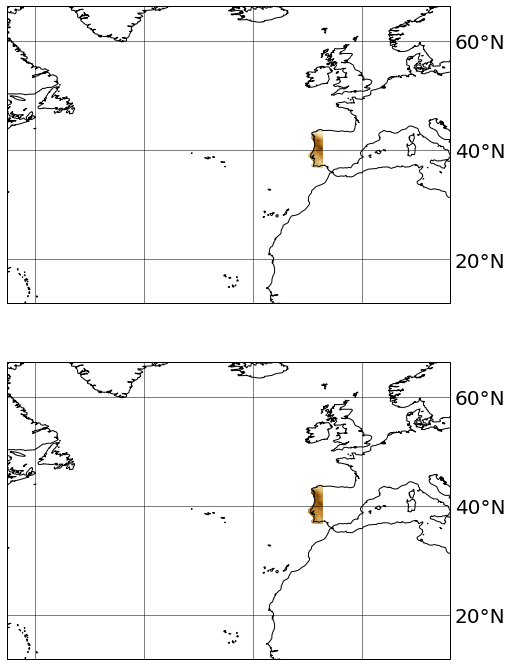

In [10]:
#north bound 
lat_bounds = [35.5,44]
lon_bounds = [-10,-7]

#initialize figure
fig = plt.figure(figsize=(10,12))
rows=2

#era precip
era_precip   = get_baseproj(plt.subplot(rows,1,1,projection=ccrs.PlateCarree()),show_lat=True)
era_precip,_ = plot_precip(ax=era_precip,
                           lon=centered_lon_precip_gpcc,
                           lat=lat_precip_gpcc,
                           precip=filter_lat_lon_2D(precip_largest_anomaly_era,
                                                    lat=lat_precip_gpcc,
                                                    lat_range=lat_bounds,
                                                    lon=centered_lon_precip_gpcc,
                                                    lon_range=lon_bounds))
#era precip
noaa_precip   = get_baseproj(plt.subplot(rows,1,2,projection=ccrs.PlateCarree()),show_lat=True)
noaa_precip,_ = plot_precip(ax=noaa_precip,
                            lon=centered_lon_precip_gpcc,
                            lat=lat_precip_gpcc,
                            precip=filter_lat_lon_2D(precip_largest_anomaly_noaa,
                                                     lat=lat_precip_gpcc,
                                                     lat_range=lat_bounds,
                                                     lon=centered_lon_precip_gpcc,
                                                     lon_range=lon_bounds))

Calculate average rainfall anomalies over western IP during extreme AHA events. THis is for statistics in the paper

In [11]:
IP_anomaly_era = np.nanmean(filter_lat_lon_2D(precip_largest_anomaly_era,
                                              lat=lat_precip_gpcc,
                                              lat_range=lat_bounds,
                                              lon=centered_lon_precip_gpcc,
                                              lon_range=lon_bounds))
IP_anomaly_noaa = np.nanmean(filter_lat_lon_2D(precip_largest_anomaly_noaa,
                                               lat=lat_precip_gpcc,
                                               lat_range=lat_bounds,
                                               lon=centered_lon_precip_gpcc,
                                               lon_range=lon_bounds))
IP_anomaly_era_percent = np.nanmean(filter_lat_lon_2D(precip_largest_anomaly_era_percent_of_mean,
                                                      lat=lat_precip_gpcc,
                                                      lat_range=lat_bounds,
                                                      lon=centered_lon_precip_gpcc,
                                                      lon_range=lon_bounds))
IP_anomaly_noaa_percent = np.nanmean(filter_lat_lon_2D(precip_largest_anomaly_noaa_percent_of_mean,
                                                       lat=lat_precip_gpcc,
                                                       lat_range=lat_bounds,
                                                       lon=centered_lon_precip_gpcc,
                                                       lon_range=lon_bounds))

# print('ERA-20CR: during extremely large AH events the observed precip anomalies on IP are '+
#       str(np.around(IP_anomaly_era,2))+
#       'mm/month ('+
#       str(np.around(IP_anomaly_era_percent,2))+
#       '% of the mean wintertime rainfall)')
# print('NOAA-CIRES-20R: during extremely large AH events the observed precip anomalies on IP are '+
#       str(np.around(IP_anomaly_noaa,2))+
#       'mm/month ('+
#       str(np.around(IP_anomaly_noaa_percent,2))+
#       '% of the mean wintertime rainfall)')
print('Reanalysis Average: during extremely large AH events the observed precip anomalies on IP are '+
      str(np.around((IP_anomaly_era+IP_anomaly_noaa)/2,2))+
      'mm/month ('+
      str(np.around((IP_anomaly_era_percent+IP_anomaly_noaa_percent)/2,2))+
      '% of the mean wintertime rainfall)')

Reanalysis Average: during extremely large AH events the observed precip anomalies on IP are -35.3mm/month (-33.25% of the mean wintertime rainfall)


Here, I'm going to average the yearly rainfall over IP. Fist find the yearly rainfall and center longitude...

In [3]:
precip_gpcc = xr.open_dataarray('/climodes/data7/datasets/tmp/GPCC_V7_rainfall_0.5deg_1901.01-2013.12.nc')[:-36,:,:]
centered_gpcc,centered_lon_precip_gpcc = fix_lon(precip_gpcc.values,precip_gpcc.lon.values)
lat_precip_gpcc = precip_gpcc.lat.values
#find yearly sums of rainfall
yearly = np.sum(centered_gpcc[587:-37,:,:].reshape([58,12,360,720]),axis=1) #     the offset year allows yearly to line 
winter = (seasonal_averages(centered_gpcc[587:-37,:,:],season='DJF')*3)[1:,:,:]            #     up with the sum of the seasons. 
summer = (seasonal_averages(centered_gpcc[587:-37,:,:],season='JJA')*3)[1:,:,:]            # exclude the fist element to line up with yearly
spring = (seasonal_averages(centered_gpcc[587:-37,:,:],season='MAM')*3)[1:,:,:]            # multiply by 3 to get accumulation
autumn = (seasonal_averages(centered_gpcc[587:-37,:,:],season='SON')*3)[1:,:,:] 

Next, plot filtered data to make sure of region...

360


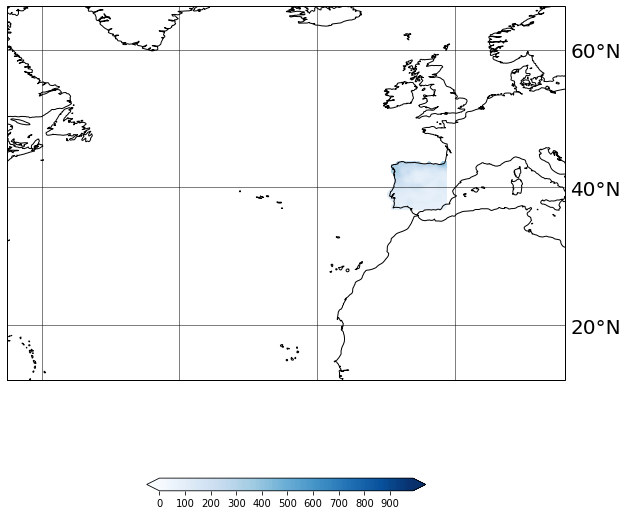

In [49]:
#north bound 
lat_bounds = [36.5,44]
lon_bounds = [-10,-1]

#initialize figure
fig = plt.figure(figsize=(10,12))

#era precip
test_ax    = get_baseproj(plt.subplot(1,1,1,projection=ccrs.PlateCarree()),show_lat=True)
im = test_ax.contourf(centered_lon_precip_gpcc,
                      lat_precip_gpcc,
                      np.mean(filter_lat_lon_3D(autumn,
                                                lat=lat_precip_gpcc,
                                                lat_range=lat_bounds,
                                                lon=centered_lon_precip_gpcc,
                                                lon_range=lon_bounds),axis=0),
                      transform=ccrs.PlateCarree(),
                      extend='both',
                      cmap='Blues',
                      levels=np.arange(0,100)*10,zorder=-1)
fig.colorbar(im,orientation='horizontal',shrink=.5)

finally, calculate average...

In [61]:
IP_annual_std   = np.nanstd(np.nanmean(np.nanmean(filter_lat_lon_3D(yearly,
                                                                    lat=lat_precip_gpcc,
                                                                    lat_range=lat_bounds,
                                                                    lon=centered_lon_precip_gpcc,
                                                                    lon_range=lon_bounds),
                                                  axis=1),
                                       axis=1))
print(IP_annual_std)

140.87581


In [60]:
np.nanstd(np.nanmean(np.nanmean(IP_annual_std,axis=1),axis=1))

140.87581

In [63]:
#annual accumulation and std
IP_annual_average=np.nanmean(filter_lat_lon_2D(yearly.mean(axis=0),
                                               lat=lat_precip_gpcc,
                                               lat_range=lat_bounds,
                                               lon=centered_lon_precip_gpcc,
                                               lon_range=lon_bounds))
IP_annual_std   = np.nanstd(np.nanmean(np.nanmean(filter_lat_lon_3D(yearly,
                                                                    lat=lat_precip_gpcc,
                                                                    lat_range=lat_bounds,
                                                                    lon=centered_lon_precip_gpcc,
                                                                    lon_range=lon_bounds),
                                                  axis=1),
                                       axis=1))
#winter asccumulation and std
IP_winter_average=np.nanmean(filter_lat_lon_2D(winter.mean(axis=0),
                                               lat=lat_precip_gpcc,
                                               lat_range=lat_bounds,
                                               lon=centered_lon_precip_gpcc,
                                               lon_range=lon_bounds))
IP_winter_std   = np.nanstd(np.nanmean(np.nanmean(filter_lat_lon_3D(winter,
                                                                    lat=lat_precip_gpcc,
                                                                    lat_range=lat_bounds,
                                                                    lon=centered_lon_precip_gpcc,
                                                                    lon_range=lon_bounds),
                                                  axis=1),
                                       axis=1))



print('The average IP annual rainfall is '+
      str(IP_annual_average)+
      'mm +/- '+
      str(np.around(IP_annual_std,2))+
      'mm')
print('The average IP winter rainfall is '+
      str(IP_winter_average)+
      'mm +/- '+
      str(np.around(IP_winter_std,2))+
      'mm')

The average IP annual rainfall is 731.8121mm +/- 140.88mm
The average IP winter rainfall is 271.2704558627579mm +/- 103.18mm


In [64]:
271/731

0.3707250341997264

Rainfall anomalies in reanalysis as a percentage of mean

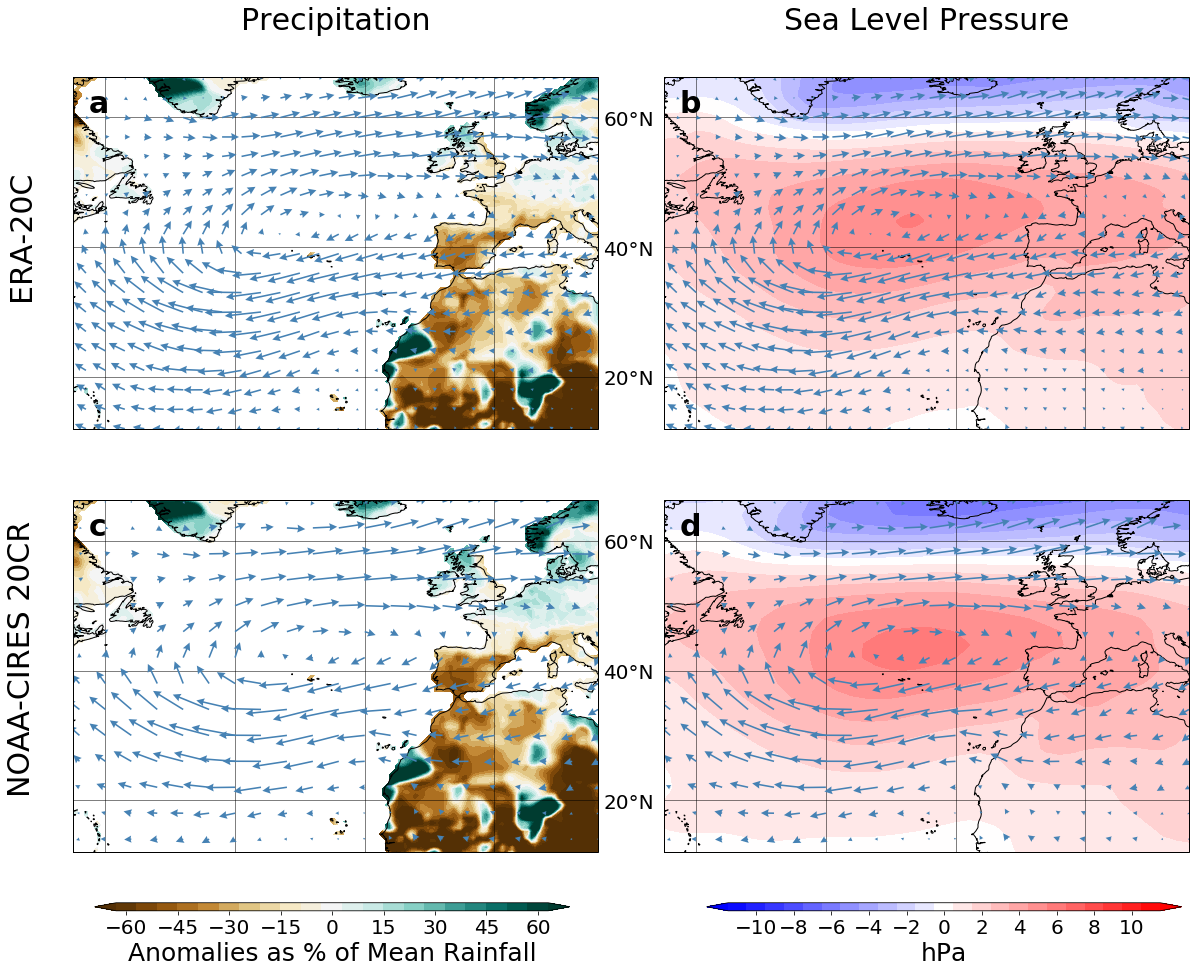

In [15]:
#initialize figure
fig = plt.figure(figsize=(20,16))

rows=2

##############################################        ERA-20CR          ##################################################

#q transport and precip during large AH
era_precip_qtrans   = get_baseproj(plt.subplot(rows,2,1,projection=ccrs.PlateCarree()),show_lat=True)
era_precip_qtrans,_ = plot_precip(ax=era_precip_qtrans,
                                  lon=centered_lon_precip_gpcc,
                                  lat=lat_precip_gpcc,
                                  precip=precip_largest_anomaly_era_percent_of_mean)
era_precip_qtrans,_ = plot_qtrans(ax=era_precip_qtrans,lon=q_850hPa_era['longitude'],lat=q_850hPa_era['latitude'],qu=uq_largest_anomaly_era,qv=vq_largest_anomaly_era,skip=3)
era_precip_qtrans.text(x=.03,y=.9,
                       s='a',
                       fontsize=30,
                       transform=era_precip_qtrans.transAxes,fontweight='bold')
era_precip_qtrans.text(-0.07, 0.55, 'ERA-20C', va='bottom', ha='center',
                        rotation='vertical', rotation_mode='anchor',
                        transform=era_precip_qtrans.transAxes,fontsize=30)
era_precip_qtrans.text(0.5, 1.2, 'Precipitation', va='top', ha='center',
                        rotation='horizontal', rotation_mode='anchor',
                        transform=era_precip_qtrans.transAxes,fontsize=30)
#q transport and psl during large AH 
era_psl_qtrans   = get_baseproj(plt.subplot(rows,2,2,projection=ccrs.PlateCarree()))
era_psl_qtrans,_ = plot_psl(ax=era_psl_qtrans,lon=centered_lon_psl_era,lat=q_850hPa_era['latitude'],psl=psl_largest_anomaly_era)
era_psl_qtrans,_ = plot_qtrans(ax=era_psl_qtrans,lon=q_850hPa_era['longitude'],lat=q_850hPa_era['latitude'],qu=uq_largest_anomaly_era,qv=vq_largest_anomaly_era,skip=3)
era_psl_qtrans.text(0.5, 1.2, 'Sea Level Pressure', va='top', ha='center',
                        rotation='horizontal', rotation_mode='anchor',
                        transform=era_psl_qtrans.transAxes,fontsize=30)
era_psl_qtrans.text(x=.03,y=.9,
                    s='b',
                    fontsize=30,
                    transform=era_psl_qtrans.transAxes,fontweight='bold')

##############################################        NOAA-20CR          ##################################################

#q transport and precip during large AH
noaa_precip_qtrans         = get_baseproj(plt.subplot(rows,2,3,projection=ccrs.PlateCarree()),show_lat=True)
noaa_precip_qtrans,precips = plot_precip(ax=noaa_precip_qtrans,
                                         lon=centered_lon_precip_gpcc,
                                         lat=lat_precip_gpcc,
                                         precip=precip_largest_anomaly_noaa_percent_of_mean)
noaa_precip_qtrans,_ = plot_qtrans(ax=noaa_precip_qtrans,lon=q_850hPa_noaa['lon'],lat=q_850hPa_noaa['lat'],qu=uq_largest_anomaly_noaa,qv=vq_largest_anomaly_noaa)
noaa_precip_qtrans.text(x=.03,y=.9,
                       s='c',
                       fontsize=30,
                       transform=noaa_precip_qtrans.transAxes,fontweight='bold')
noaa_precip_qtrans.text(-0.07, 0.55, 'NOAA-CIRES 20CR', va='bottom', ha='center',
                        rotation='vertical', rotation_mode='anchor',
                        transform=noaa_precip_qtrans.transAxes,fontsize=30)
#q transport and psl during large AH 
noaa_psl_qtrans   = get_baseproj(plt.subplot(rows,2,4,projection=ccrs.PlateCarree()))
noaa_psl_qtrans,pres = plot_psl(ax=noaa_psl_qtrans,lon=centered_lon_psl_noaa,lat=q_850hPa_noaa['lat'],psl=psl_largest_anomaly_noaa)
noaa_psl_qtrans,_ = plot_qtrans(ax=noaa_psl_qtrans,lon=q_850hPa_noaa['lon'],lat=q_850hPa_noaa['lat'],qu=uq_largest_anomaly_noaa,qv=vq_largest_anomaly_noaa)
noaa_psl_qtrans.text(x=.03,y=.9,
                       s='d',
                       fontsize=30,
                       transform=noaa_psl_qtrans.transAxes,fontweight='bold')

#ADD COLORBARS
fig.subplots_adjust(bottom=0.145)
#precip colorbar
precip_cbar_ax = fig.add_axes([0.14, 0.125, 0.33, 0.007])
precip_cbar = fig.colorbar(precips, cax=precip_cbar_ax,orientation='horizontal',ticks=np.arange(-60,63,15))
precip_cbar.ax.tick_params(labelsize=20)
precip_cbar.set_label('Anomalies as % of Mean Rainfall',fontsize=25)
# #psl colorbar
psl_cbar_ax = fig.add_axes([0.565, 0.125, 0.33, 0.007])
psl_cbar = fig.colorbar(pres, cax=psl_cbar_ax,orientation='horizontal',ticks=np.arange(-10,11,2))
psl_cbar.ax.tick_params(labelsize=20)
psl_cbar.set_label('hPa',fontsize=25)

#Final touchups 
fig.subplots_adjust(wspace=.125,hspace=.0001)

In [1]:
%run AzoresHighProjectImports.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/DataAnalyzing.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/DataProcessing.py
%run /home/ncresswell/AzoresHighExpansion/MyFunctions/Plotting.py

import time
from scipy.interpolate import griddata
from scipy import stats

"""
This function will plot frequency of extreme events as reported by ERA-20C pressure data over a defined window 

USAGE: to use pass an index that is defined through time, and specify what the threshold is for extreme event using the
      'percent' perameter. 

"""

def running_bin_extremes(index=None, percent=20, window=11, time=np.arange(1850,2006), label_large = '',label_small = '',title = '',legend_loc=2, index_has_nan=False,ylim=None):

    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index_shape)
    
    running_bin_big, running_bin_small = get_bin_timeseries(index=index, percent=percent, window=window)
        
    fig, ax = plt.subplots(figsize=(20,10))

    ax.plot(time,running_bin_big,color='red',linewidth=3,alpha=2,label=label_large);
    ax.plot(time,running_bin_small,color='blue',linewidth=3,alpha=10,label=label_small);
   
    #Alter Ticks and labels
    ax.set_xticklabels(ax.get_xticks().astype(int),fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=20)
    ax.set_ylabel('Number of Extreme Events',fontsize=25)
    
    ax.legend(fontsize=30,loc=legend_loc);
    ax.set_title(title,fontsize=35);
    
    return fig,ax

"""
This function offers the same functionality of the running_bin_extremes_era data but is altered to account for the CESM_LME
meaning it assumed the first dimension of the data is ensemble member number. 

usage: pass index defined along ensemble member and time. observe the default parameters used in the calculation and
       rendering of the plot and change if desired 
"""

def running_bin_extremes_lme(index=None, percent=20, window=11, label_large = '',label_small = '',title = '',legend_loc=2, index_has_nan=False,ylim=None):

    #initialize containers for running bin diagnostic 
    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index.shape)
    
    #iterate through ensemble members
    for e_mem in range(0,13):

        running_bin_big[e_mem,:],running_bin_small[e_mem,:] = get_bin_timeseries(index=index[e_mem,:], 
                                                                                 percent=percent, window=window)

    fig, ax = plt.subplots(figsize=(20,10))
        
    ax.plot(time,running_bin_big.mean(axis=0),color='red',linewidth=3,alpha=2,label=label_large);
    ax.plot(time,running_bin_small.mean(axis=0),color='blue',linewidth=3,alpha=10,label=label_small);
   
    #Alter Ticks and labels
    ax.set_xticklabels(ax.get_xticks().astype(int),fontsize=20)
    ax.set_yticklabels(ax.get_yticks().astype(int),fontsize=20)
    ax.set_ylabel('Number of Extreme Events',fontsize=25)
    
    ax.legend(fontsize=30,loc=legend_loc);
    ax.set_title(title,fontsize=35);
    
    return fig,ax

def get_bin_timeseries(index=None, percent=20, window=11):
    
    running_bin_big   = np.zeros(index.shape)
    running_bin_small = np.zeros(index.shape)
    
    #get list of extreme years
    _,where_largest  = get_extremes(series=index,percent=percent,top=True)
    _,where_smallest = get_extremes(series=index,percent=percent,bot=True)
    
    running_bin_big,_  = extremes_per_window(date_range=np.arange(0,index.size), \
                                                      dates_of_extremes=where_largest, \
                                                      window=window);
    running_bin_small,_= extremes_per_window(date_range=np.arange(0,index.size), \
                                                      dates_of_extremes=where_smallest, \
                                                      window=window);
    
    return running_bin_big, running_bin_small

# def get_aha(filename, lon_name='lon',lat_name='lat',var_name='psl',lat_range=[10,52],lon_range=[-60,10],threshold=1021,conversion_factor=1/100,mf_dataset = False,return_psl=True):
    
#     #load data
#     if mf_dataset:
#         psl = xr.open_mfdataset(filename,
#                                 decode_times=False,
#                                 decode_cf=False,
#                                 concat_dim='time')[var_name]
#     else:
#         psl = xr.open_dataset(filename)[var_name]
#     #get seasonal average DJF, also center longitude
#     psl_djf,centered_lon = fix_lon(seasonal_averages(psl.values,
#                                                      season='DJF')*conversion_factor,
#                                    psl[lon_name].values)
#     #calculate AHA diagnostic
#     ah = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf,
#                                                      below=True,
#                                                      threshold=threshold),
#                         lat=psl[lat_name].values,
#                         lat_range=lat_range,
#                         lon=centered_lon,
#                         lon_range=lon_range)
#     #find AHA
#     aha = get_area_of_filtered_data(ah,lat=psl[lat_name].values,
#                                     lon=centered_lon)
#     if return_psl:
#         return aha, psl_djf, centered_lon
#     else:
#         return aha  
    
def get_aha(filename, lon_name='lon',lat_name='lat',var_name='psl',lat_range=[10,52],lon_range=[-60,10],threshold=1021.5,conversion_factor=1/100,mf_dataset = False,return_psl=False,
            detrend = True, trend_region = {'lon_min':-180,'lon_max':180,'lat_min':-90,'lat_max':90}):
    
    #load data
    if mf_dataset:
        psl = xr.open_mfdataset(filename,
                                decode_times=False,
                                decode_cf=False,
                                concat_dim='time')[var_name]
    else:
        psl = xr.open_dataset(filename)[var_name]
    #get seasonal average DJF, also center longitude
    psl_djf,centered_lon = fix_lon(seasonal_averages(psl.values,
                                                     season='DJF')*conversion_factor,
                                   psl[lon_name].values)
    
    if detrend:
        psl_djf = remove_trend_from_region(psl_djf,psl[lat_name],psl[lon_name],trend_region)
        
    #calculate AHA diagnostic
    ah = filter_lat_lon(data_unfiltered=filter_tresh(data_unfiltered=psl_djf,
                                                     below=True,
                                                     threshold=threshold),
                        lat=psl[lat_name].values,
                        lat_range=lat_range,
                        lon=centered_lon,
                        lon_range=lon_range)
    #find AHA
    aha = get_area_of_filtered_data(ah,lat=psl[lat_name].values,
                                    lon=centered_lon)
    if return_psl:
        return aha, psl_djf, centered_lon
    else:
        return aha 

def remove_trend_from_region(psl_djf,lat,lon,trend_region):
    
    dt_data = psl_djf[:,np.logical_and( lat>=trend_region['lat_min'], lat<=trend_region['lat_max']),:]
    dt_data = dt_data[:,:,np.logical_and( lon>=trend_region['lon_min'], lon<=trend_region['lon_max'])] 

    dt_time = np.arange(1850,1850+len(psl_djf))
    dt_timesteps = np.arange(0,dt_time.size)

    trends = np.empty(dt_data.shape[1:])

    #loop through space to get trends 
    for i in range(0,dt_data.shape[1]):
        for j in range(0,dt_data.shape[2]):    
            trends[i,j] = stats.linregress(dt_time,dt_data[:,i,j]).slope

    #create copy of array 
    psl_detrended = psl_djf.copy()

    #calculate geographic weights for later weighted avhc2ging ~~~~ again you must slice one dimension at a time
    weights = np.asarray([np.cos(np.deg2rad(lat))]*lon.shape[0]).transpose()[np.logical_and( lat>=trend_region['lat_min'], lat<=trend_region['lat_max']),:]
    weights = weights[:,np.logical_and( lon>=trend_region['lon_min'], lon<=trend_region['lon_max'])]

    dt_trend = np.average(trends, weights=weights)*dt_timesteps
    
    #loop through PSL and subtract trend_timeseries
    for la in np.where(np.logical_and( lat>trend_region['lat_min'], lat<trend_region['lat_max']))[0]:
        for lo in np.where(np.logical_and( lon>trend_region['lon_min'], lon<trend_region['lon_max']))[0]:

            psl_detrended[:,la,lo] = psl_djf[:,la,lo] - dt_trend

    return psl_detrended
    
def get_composite_fields(aha=None,precip_djf=None,uq_850hPa_djf=None,vq_850hPa_djf=None,psl_djf=None,extreme_percent=15):

    ###########################################     FIND EXTREME EVENTS    #########################################
    _,where_largest  = get_extremes(series=aha,percent=extreme_percent,top=True)
    _,where_smallest = get_extremes(series=aha,percent=extreme_percent,bot=True)

    ###########################################     PRECIP ANOMALIES   ##############################################
    precip_largest_anomaly  = precip_djf[where_largest,:,:].mean(axis=0)-precip_djf.mean(axis=0)
    #######################################     U TRANSPORT ANOMALIES   ##########################################
    uq_largest_anomaly  = uq_850hPa_djf[where_largest,:,:].mean(axis=0)-uq_850hPa_djf.mean(axis=0)
    #######################################     V TRANSPORT ANOMALIES   ##########################################
    vq_largest_anomaly  = vq_850hPa_djf[where_largest,:,:].mean(axis=0)-vq_850hPa_djf.mean(axis=0)
    ###########################################     PSL ANOMALIES   ###############################################
    psl_largest_anomaly  = psl_djf[where_largest,:,:].mean(axis=0)-psl_djf.mean(axis=0)
    
    return precip_largest_anomaly,uq_largest_anomaly,vq_largest_anomaly, psl_largest_anomaly

def get_baseproj(ax=None,show_lon=False,show_lat=False):

    ax.set_global()
    ax.set_extent([-65,16,12,60])
    
    #gridlines for references
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                       linewidth=.5, color='k', linestyle='-',zorder=0)
    gl.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
    gl.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
    
    if show_lon:
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 20, 'color': 'k'}
    else:
        gl.xlabels_bottom = False
        
    if show_lat:
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 20, 'color': 'k'}
    else:
        gl.ylabels_right = False
    
    gl.xlabels_top = False
    gl.ylabels_left = False

    ax.coastlines(linewidth = 1,
                  resolution = '50m',
                  color = 'k',zorder=0);
    
    return ax
    
def plot_precip(ax=None,lon=None,lat=None,precip=None,conversion=1,add_cp_lon=True):
    
    if add_cp_lon:
        new_precip,new_lon = add_cyclic_point(data=precip,coord=lon)
        im = ax.contourf(new_lon,lat,new_precip*conversion,
                      transform=ccrs.PlateCarree(),
                      extend='both',
                      cmap='BrBG',
                      levels=np.arange(-63,66,6)*conversion,zorder=-1)
    else:
        im = ax.contourf(lon,lat,precip*conversion,
                          transform=ccrs.PlateCarree(),
                          extend='both',
                          cmap='BrBG',
                          levels=np.arange(-63,66,6)*conversion,zorder=-1)
    return ax,im

def plot_psl(ax=None,lon=None,lat=None,psl=None,conversion=1,add_cp_lon=True):
    
    if add_cp_lon:
        new_psl,new_lon = add_cyclic_point(data=psl,coord=lon)
        im = ax.contourf(new_lon,lat,new_psl*conversion,
                         transform=ccrs.PlateCarree(),
                         extend='both',
                         cmap='bwr',
                         levels=np.arange(-11.5,11.6,1),
                         zorder=-1)
    else:
        im = ax.contourf(lon,lat,psl*conversion,
                         transform=ccrs.PlateCarree(),
                         extend='both',
                         cmap='bwr',
                         levels=np.arange(-11.5,11.6,1),
                         zorder=-1)
    return ax,im

def plot_qtrans(ax=None,lon=None,lat=None,qu=None,qv=None,skip=2,legend=False):
    
    vec = ax.quiver(lon[::skip], 
                    lat[::skip], 
                    qu[::skip,::skip], 
                    qv[::skip,::skip], 
                    angles='xy',
                    color="steelblue",
                    scale=.2,
                    width=.003,
                    headwidth=5,
                    transform=ccrs.PlateCarree());
    if legend:
        #draw background for quiver key
        ax.add_patch(mpatches.Rectangle(xy=[-63, 56], width=32, height=8,
                                    facecolor='white',
                                    edgecolor='black',
                                    alpha=1,
                                    transform=ccrs.PlateCarree())
                     )

        ax.quiverkey(qv2,X=0.23, Y=.85, U=.01,label='10 $g*m*kg^{-1}*s^{-1}$',fontproperties={'size':15},zorder=12.6)
    return ax,vec

def get_values(x,y,xs,ys,data):
    return data[np.where(ys==y)[0][0],np.where(xs==x)[0][0]]

def get_interpolated_grid(lon_data=None,lat_data=None,data=None,lon_interp=np.arange(0,360,2),lat_interp = np.arange(-90,90,2)):
    
    #dafine existing fields as points and values 
    points = np.array(np.meshgrid(lat_data,lon_data)).T.reshape(-1,2)
    values = np.empty([points.shape[0]])
    for i in range(0,points.shape[0]):
        values[i] = get_values(points[i,1],points[i,0],lon_data,lat_data,data)

    #perform interpolation with new grid 
    lat_interp_grid,lon_interp_grid = np.meshgrid(lon_interp,lat_interp)
    return griddata(points,values,(lon_interp_grid,lat_interp_grid),method = 'linear')
    
def mm2mmd(precip):

    precip_data = precip.values

    #january
    precip_data[np.arange(0,precip_data.shape[0],12),:,:]=precip_data[np.arange(0,precip_data.shape[0],12),:,:]/31
    #feb
    precip_data[np.arange(1,precip_data.shape[0],12),:,:]=precip_data[np.arange(1,precip_data.shape[0],12),:,:]/28
    #mar
    precip_data[np.arange(2,precip_data.shape[0],12),:,:]=precip_data[np.arange(2,precip_data.shape[0],12),:,:]/31
    #april
    precip_data[np.arange(3,precip_data.shape[0],12),:,:]=precip_data[np.arange(3,precip_data.shape[0],12),:,:]/30
    #may
    precip_data[np.arange(4,precip_data.shape[0],12),:,:]=precip_data[np.arange(4,precip_data.shape[0],12),:,:]/31
    #june
    precip_data[np.arange(5,precip_data.shape[0],12),:,:]=precip_data[np.arange(5,precip_data.shape[0],12),:,:]/30
    #july
    precip_data[np.arange(6,precip_data.shape[0],12),:,:]=precip_data[np.arange(6,precip_data.shape[0],12),:,:]/31
    #aug
    precip_data[np.arange(7,precip_data.shape[0],12),:,:]=precip_data[np.arange(7,precip_data.shape[0],12),:,:]/31
    #sep
    precip_data[np.arange(8,precip_data.shape[0],12),:,:]=precip_data[np.arange(8,precip_data.shape[0],12),:,:]/30
    #oct
    precip_data[np.arange(9,precip_data.shape[0],12),:,:]=precip_data[np.arange(9,precip_data.shape[0],12),:,:]/31
    #nov
    precip_data[np.arange(10,precip_data.shape[0],12),:,:]=precip_data[np.arange(10,precip_data.shape[0],12),:,:]/30
    #dec
    precip_data[np.arange(11,precip_data.shape[0],12),:,:]=precip_data[np.arange(11,precip_data.shape[0],12),:,:]/31

    return precip_data

def filter_lat_lon_2D(data_unfiltered,lat=None, lat_range=None, lon=None, lon_range=None, filter_val=np.nan):
    
    #make deep copy of array
    filtered = data_unfiltered.copy()

    #filter north
    filtered[np.array([lat>lat_range[1],]*filtered.shape[1]).transpose()] = filter_val
    #filter south
    filtered[np.array([lat<lat_range[0],]*filtered.shape[1]).transpose()] = filter_val   
    #filter west
    filtered[np.array([lon<lon_range[0],]*filtered.shape[0])] = filter_val
    #filter east
    filtered[np.array([lon>lon_range[1],]*filtered.shape[0])] = filter_val

    return filtered

def filter_lat_lon_3D(data_unfiltered,lat=None, lat_range=None, lon=None, lon_range=None, filter_val=np.nan):
    
    #make deep copy of array
    filtered = data_unfiltered.copy()

    #filter north
    filtered[np.array([np.array([lat>lat_range[1]]*filtered.shape[2]).transpose()]*filtered.shape[0])] = filter_val
    #filter south
    filtered[np.array([np.array([lat<lat_range[0]]*filtered.shape[2]).transpose()]*filtered.shape[0])] = filter_val   
    #filter west
    filtered[np.array([np.array([lon>lon_range[1]]*filtered.shape[1])]*filtered.shape[0])] = filter_val
    #filter east
    filtered[np.array([np.array([lon<lon_range[0]]*filtered.shape[1])]*filtered.shape[0])] = filter_val

    return filtered

            
    